In [1]:
!pip install category_encoders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
import scipy.stats as stats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sleep_Data_Sampled.csv')

PCA Solution: By definition, PCs are orthogonal (uncorrelated). The resulting correlation heatmap of the PCs will have a diagonal of 1 (each PC is perfectly correlated with itself) and zeros everywhere else. This "clean" heatmap immediately confirms that PCA has successfully distilled the data into its core, independent drivers. The insight then comes from the next step: analyzing the loadings.

In [ ]:
PCA

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame
# Separate the features (X) - exclude non-numeric columns and the target if it's in this DataFrame
# Select only numeric columns
X = df.select_dtypes(include=np.number)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

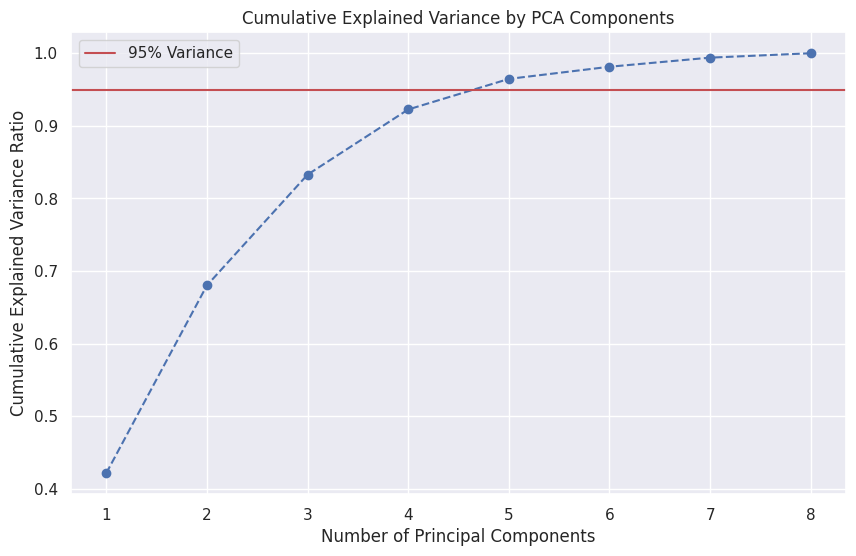

In [9]:
# Fit PCA to the data
pca = PCA()
pca.fit(X_scaled)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance') # Common threshold
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Re-fit PCA with the chosen number of components
n_components = 5
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the new components
pca_columns = [f'PC_{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

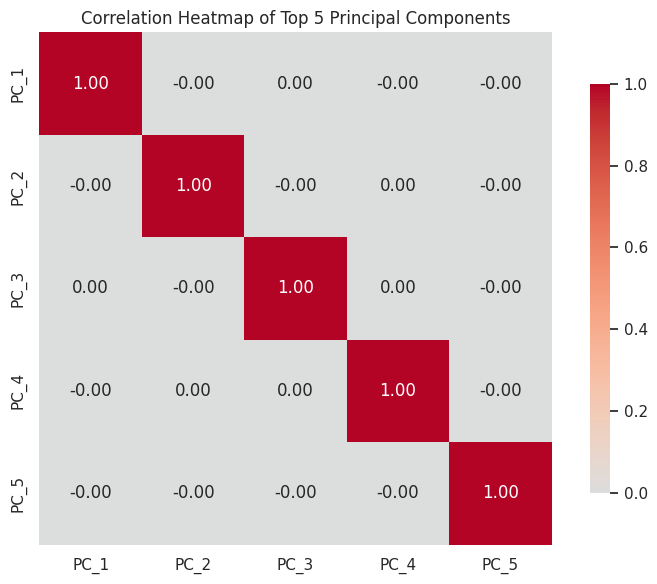

In [11]:
# Calculate the correlation matrix of the principal components
corr_matrix_pca = df_pca.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_pca, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            square=True, cbar_kws={"shrink": .8})
plt.title(f'Correlation Heatmap of Top {n_components} Principal Components')
plt.tight_layout()
plt.show()

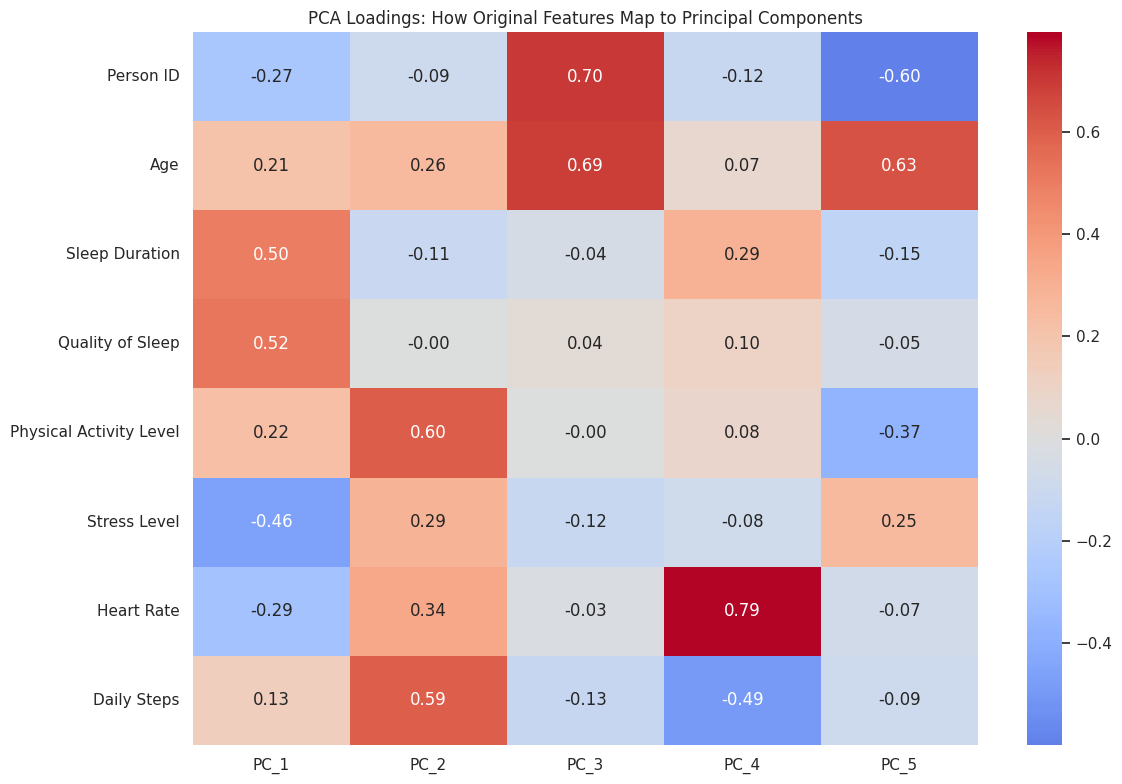

In [13]:
# Get the loadings (how each original feature contributes to each PC)
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=pca_columns, index=X.columns)

# Now create a heatmap of the loadings
plt.figure(figsize=(12, 8))
sns.heatmap(df_loadings, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('PCA Loadings: How Original Features Map to Principal Components')
plt.tight_layout()
plt.show()

In [17]:
# Save the cleaned dataset to Google Drive
output_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Cleaned_Sleep_Data.csv'
df.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to: {output_path}")

Cleaned dataset saved to: /content/drive/MyDrive/Colab Notebooks/Dataset/Cleaned_Sleep_Data.csv
